In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
from PIL import Image

import sys
sys.path.append('src/')
from get_squeezenet import get_squeezenet
from training_utils import predict_proba


import matplotlib.pyplot as plt
%matplotlib inline

# Load a few images

In [3]:
local_images = [
    'dog.jpg', 'canoe.jpg', 'car.jpg', 'cat.jpg', 
    'tabby.jpg', 'submarine.jpg', 'snake.jpg', 'teapot.jpg'
]

In [4]:
pictures = np.zeros((8, 224, 224, 3), dtype='float32')
for i, pic in enumerate(local_images):
    x = Image.open('images/' + pic).resize((224, 224), Image.LANCZOS)
    # predictions can depend on the resizing method (try NEAREST)
    pictures[i] = np.asarray(x, dtype='float32')

# Predict

In [5]:
graph, ops = get_squeezenet(tf.train.AdamOptimizer(1e-3))

In [6]:
weights = np.load('pretrained_weights.npy')[()]
class_names = np.load('imagenet_class_names.npy')

In [7]:
predictions = predict_proba(graph, ops, pictures, network_weights=weights)

In [8]:
predicted_classes = class_names[predictions.argsort()[:, 998:]]
predicted_probs = np.sort(predictions)[:, 998:]

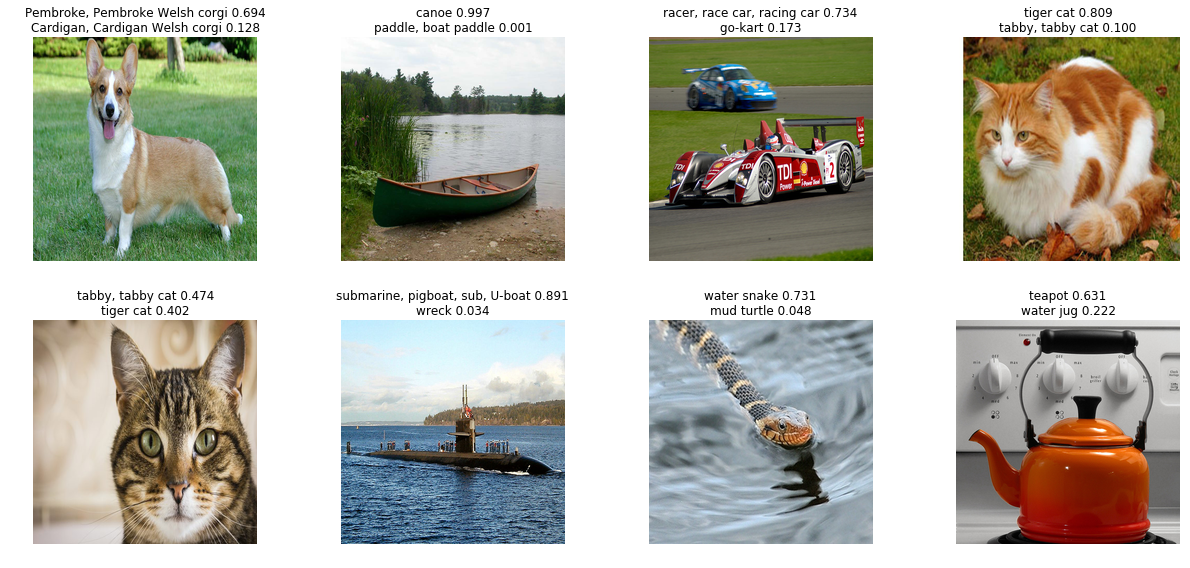

In [9]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 8))
axes = axes.flatten()
for i, pic in enumerate(pictures):
    axes[i].set_axis_off();
    axes[i].imshow(pic/255.0);
    title = (predicted_classes[i][-1] + ' {0:.3f}' +\
        '\n' + predicted_classes[i][-2] + ' {1:.3f}').\
        format(predicted_probs[i][-1], predicted_probs[i][-2])
    axes[i].set_title(title);
plt.tight_layout()